In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('crosswords_hardness.csv')

In [17]:
data['date'] = pd.to_datetime(data['date'])
day_name = data['date'].dt.day_name()
data['day_name'] = day_name

In [18]:
#get time in minutes decimilized from average_time
def get_time_in_minutes(time):
    dividers = time.count(':')
    if dividers == 1:
        time = time.split(':')
        return float(time[0]) + float(time[1]) / 60
    else:
        time = time.split(':')
        return float(time[0]) * 60 + float(time[1])+ float(time[2]) / 60
data['average_time_in_minutes'] = data['average_time'].apply(get_time_in_minutes)

Text(0.5, 1.0, 'Average Time to Complete The New York Times Crossword by Day of the Week')

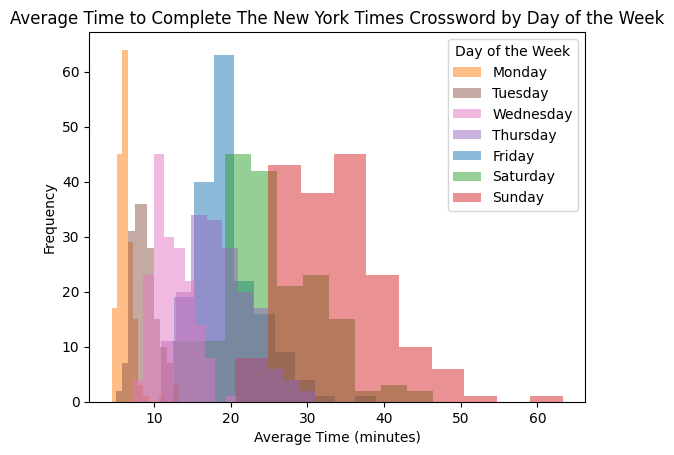

In [19]:
fig, ax = plt.subplots()
#create a histogram of average length binned by day of the week
data.groupby('day_name')['average_time_in_minutes'].plot(kind='hist', ax=ax, alpha=0.5, legend=True)
handles, labels = plt.gca().get_legend_handles_labels()
wanted_order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
order = {day: i for i, day in enumerate(wanted_order)}
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: order[t[0]]))
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title='Day of the Week', loc='upper right')
plt.xlabel('Average Time (minutes)')
plt.ylabel('Frequency')
plt.title('Average Time to Complete The New York Times Crossword by Day of the Week')

In [20]:
import Main_crossword_functions as mcf


In [21]:
empty_spaces=[]
for i in range(len(data)):
    crossword = mcf.opening_file(data['date'][i].strftime('%Y-%m-%d'))
    if crossword == None:
        empty_spaces.append(None)
    else:
        metadata,answers,clues = mcf.split_sections(crossword)
        empty_spaces.append(mcf.empty_spaces(answers))
data['empty_spaces'] = empty_spaces

The file for the date 2025-03-26 does not exist
The file for the date 2025-03-25 does not exist
The file for the date 2025-03-24 does not exist
The file for the date 2025-03-23 does not exist
The file for the date 2025-03-22 does not exist
The file for the date 2025-03-21 does not exist
The file for the date 2025-03-20 does not exist
The file for the date 2025-03-19 does not exist
The file for the date 2025-03-18 does not exist
The file for the date 2025-03-17 does not exist
The file for the date 2025-03-16 does not exist
The file for the date 2025-03-15 does not exist
The file for the date 2025-03-14 does not exist
The file for the date 2025-03-13 does not exist
The file for the date 2025-03-12 does not exist
The file for the date 2025-03-11 does not exist
The file for the date 2025-03-10 does not exist
The file for the date 2025-03-09 does not exist
The file for the date 2025-03-08 does not exist
The file for the date 2025-03-07 does not exist
The file for the date 2025-03-06 does no

In [22]:
filled_spaces=[]
for i in range(len(data)):
    crossword = mcf.opening_file(data['date'][i].strftime('%Y-%m-%d'))
    if crossword == None:
        filled_spaces.append(None)
    else:
        metadata,answers,clues = mcf.split_sections(crossword)
        filled_spaces.append(mcf.filled_spaces(answers))
data['filled_spaces'] = filled_spaces

The file for the date 2025-03-26 does not exist
The file for the date 2025-03-25 does not exist
The file for the date 2025-03-24 does not exist
The file for the date 2025-03-23 does not exist
The file for the date 2025-03-22 does not exist
The file for the date 2025-03-21 does not exist
The file for the date 2025-03-20 does not exist
The file for the date 2025-03-19 does not exist
The file for the date 2025-03-18 does not exist
The file for the date 2025-03-17 does not exist
The file for the date 2025-03-16 does not exist
The file for the date 2025-03-15 does not exist
The file for the date 2025-03-14 does not exist
The file for the date 2025-03-13 does not exist
The file for the date 2025-03-12 does not exist
The file for the date 2025-03-11 does not exist
The file for the date 2025-03-10 does not exist
The file for the date 2025-03-09 does not exist
The file for the date 2025-03-08 does not exist
The file for the date 2025-03-07 does not exist
The file for the date 2025-03-06 does no

In [23]:
data['average_normalized_time'] = data['average_time_in_minutes'] / data['filled_spaces']

Text(0.5, 1.0, 'Average Time to Complete The New York Times Crossword by Day of the Week')

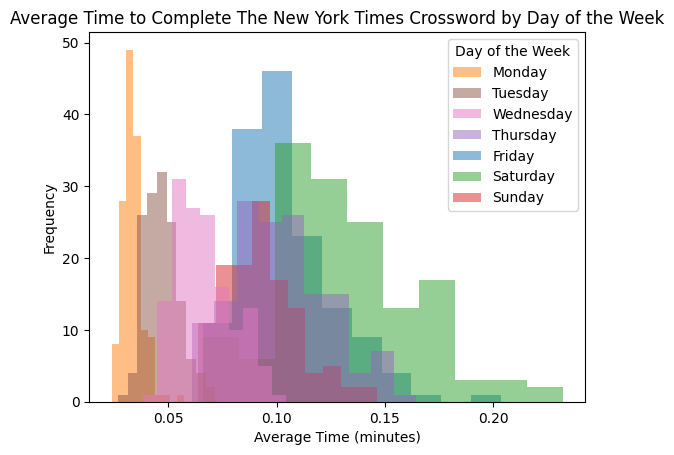

In [24]:
fig, ax = plt.subplots()
#create a histogram of average length binned by day of the week
data.groupby('day_name')['average_normalized_time'].plot(kind='hist', ax=ax, alpha=0.5, legend=True)
handles, labels = plt.gca().get_legend_handles_labels()
wanted_order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
order = {day: i for i, day in enumerate(wanted_order)}
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: order[t[0]]))
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title='Day of the Week', loc='upper right')
plt.xlabel('Average Time (minutes)')
plt.ylabel('Frequency')
plt.title('Average Time to Complete The New York Times Crossword by Day of the Week')

<Axes: xlabel='day_name', ylabel='average_normalized_time'>

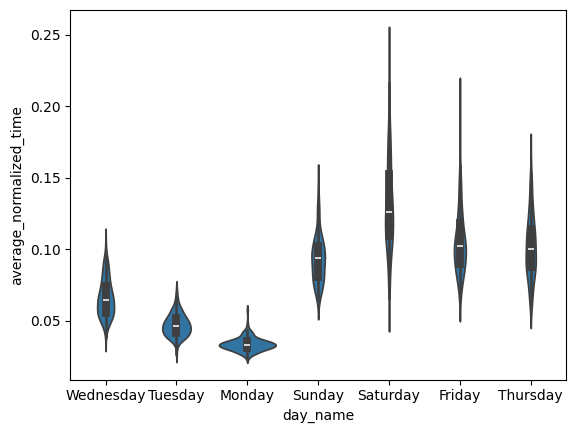

In [25]:


sns.violinplot(x=data['day_name'], y=data['average_normalized_time'])